# HistGradientBoostingRegressor
Pour ce besoin qui consiste à prédire les consénquences humaines (nombre de morts et nombre de blessés) et matérielles (dommages en millions de dollars) des tremblements de terre, nous avons choisi d'utiliser le modèle Hist Gradient Boosting Regressor, pour sa capacité d'accepter les valeurs nulles étant donné nos données comportent beaucoup de valeurs nulles.


# Ce modèle vise à prédire le nombre de blessés des séismes

#Tout d'abord, les librairies ci-dessous sont nécessaires pour le fonctionnement du modèle :

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder


# Fichier d'entrée pour le modèle d'entraînement
Ici, nous chargeons notre dataset et nous supprimons les lignes pour lesquelles notre variable cible (nombre de morts) est nulle

In [2]:
data = pd.read_csv("../data/human_and_material_consequences.csv", sep=';')

print(data.head())

data = data.dropna(subset=['injuries'])

print(len(data))


   year countryName  deaths  intervaldeath  injuries intervalinjuries  \
0  1926   Indonesia     NaN  Not specified       NaN    Not specified   
1  1926   Nicaragua     NaN  Not specified       NaN    Not specified   
2  1926       China     NaN  Not specified       NaN    Not specified   
3  1926       Chile     NaN  Not specified       NaN    Not specified   
4  1926     Albania     NaN  Not specified       NaN    Not specified   

   damagemillionsdollars intervaldamagemillionsdollars  depth  intervaldepth  \
0                    NaN                 Not specified    NaN  Not specified   
1                    NaN                 Not specified  135.0         50-410   
2                    NaN                 Not specified    NaN  Not specified   
3                    NaN                 Not specified   33.0          10-50   
4                    NaN                 Not specified    NaN  Not specified   

   ...  sealevelrise intervalsealevelrise  co2emissions    intervalco2  \
0  ...

#Définiton des features et normalisation des données
Nous définition nos ensembles d'entraînement et de test, nous avons fixer le paramètre random_state à 45 :


In [3]:
features = data.drop(['injuries'], axis = 1)
target = data['injuries']

# Séparation des variables catégorielles et numériques
categorical_cols = [col for col in features if data[col].dtype == 'object']
numerical_cols = [col for col in features if data[col].dtype != 'object']

X = features
y = target

# Normalisation des données numériques
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)


#Transformation des variables catégorielles
Les variables catégorielles pouvant être utilisées, nous avons éffectué du Ordinal Encoding sur ces variables afin de les transformer pour qu'elles soient mieux traitées par notre modèle.

In [ ]:
cat_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_cols)
    ], remainder='passthrough')



# Initialisation et entraînement du modèle
Maintenant que nos différents ensembles sont prêt, nous pouvons initialiser notre modèle et l'entraîner, avec les hyperparamètres suivants :
loss="absolute_error", l2_regularization = 0.0004, max_iter= 165, max_leaf_nodes= 15, min_samples_leaf= 10

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = HistGradientBoostingRegressor(loss="absolute_error", l2_regularization = 0.0004,
                                      max_iter= 165, max_leaf_nodes= 15, min_samples_leaf= 10)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

print(y_pred)


[-9.52609522e+00  3.11842171e+01  1.34112152e+01  2.17557649e+02
  2.77098027e+03  2.85391217e+03  1.44439567e+02  2.10822206e+01
  2.37949663e+01  1.62320337e+01  9.21552299e+02  4.49039561e+00
  9.05950869e+02  1.97330268e+01  2.46370456e+02  8.75895645e+01
  2.61274479e+02  4.70392193e+02  9.24500263e+02  2.48982898e+02
  2.14526128e+01  3.30536874e+02  4.36135902e+01  2.62800406e+03
  1.98323241e+04  5.01713585e+02  3.17393626e+01  3.35103446e+01
  1.08783452e+03  2.07350792e+02  8.92378478e+01  2.10354608e+02
  7.42227878e+02  9.72639121e+00  3.29259544e+01  1.55445884e+02
  1.60876234e+02  1.46461624e+02  1.87757327e+03  1.46604020e+02
  2.37323724e+01  7.10633808e+03  3.88613862e+00  1.53993826e+01
  3.51125288e+01  7.13688153e+01  1.43924714e+01  1.17671043e+01
  2.16586416e+01  1.95167723e+00  1.10618849e+02  1.35555267e+02
  1.65543735e+04  3.51297607e+01  7.23577302e+02  1.59509373e+02
  3.09822080e+04  1.52783694e+01  1.33160984e+02  9.99662773e+00
  2.10911280e+02  1.36754

# Evalutation du modèle
Maintenant que notre modèle a été initialiser et entraîner, il est temps d'évaluer ses performances

In [ ]:
# Évaluation de la performance du modèle
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Mean Absolute Error: 1015.5257237215606
R2 Score: 0.62831682921165


#Visualisation
Nous pouvons visualiser les valeurs prédites par notre modèle par rapport aux valeurs réelles afin de mieux évaluer les performances du modèle

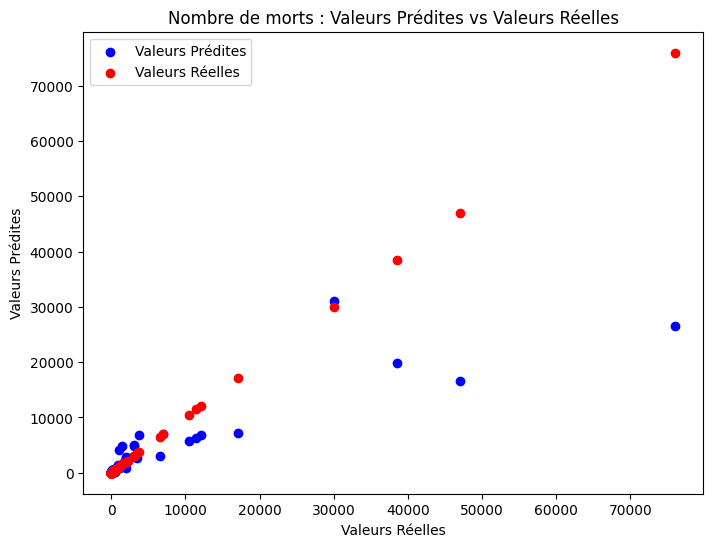

In [ ]:
# Visualisation des valeurs prédites par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valeurs Prédites')
plt.scatter(y_test, y_test, color='red', label='Valeurs Réelles')
plt.title('Nombre de blésses : Valeurs Prédites vs Valeurs Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.legend()
plt.show()
